2024-09-16 18:43:42,735 [MainThread  ] [INFO ]  Retrieving http://search.maven.org/remotecontent?filepath=org/apache/tika/tika-server-standard/2.6.0/tika-server-standard-2.6.0.jar to /tmp/tika-server.jar.


reading data/input/myresume/tylerbeasley_resume.pdf
Reading from data/input/myresume/tylerbeasley_resume.pdf


2024-09-16 18:43:45,037 [MainThread  ] [INFO ]  Retrieving http://search.maven.org/remotecontent?filepath=org/apache/tika/tika-server-standard/2.6.0/tika-server-standard-2.6.0.jar.md5 to /tmp/tika-server.jar.md5.
2024-09-16 18:43:45,528 [MainThread  ] [WARNI]  Failed to see startup log message; retrying...


Writing to data/output/tylerbeasley_resume.txt


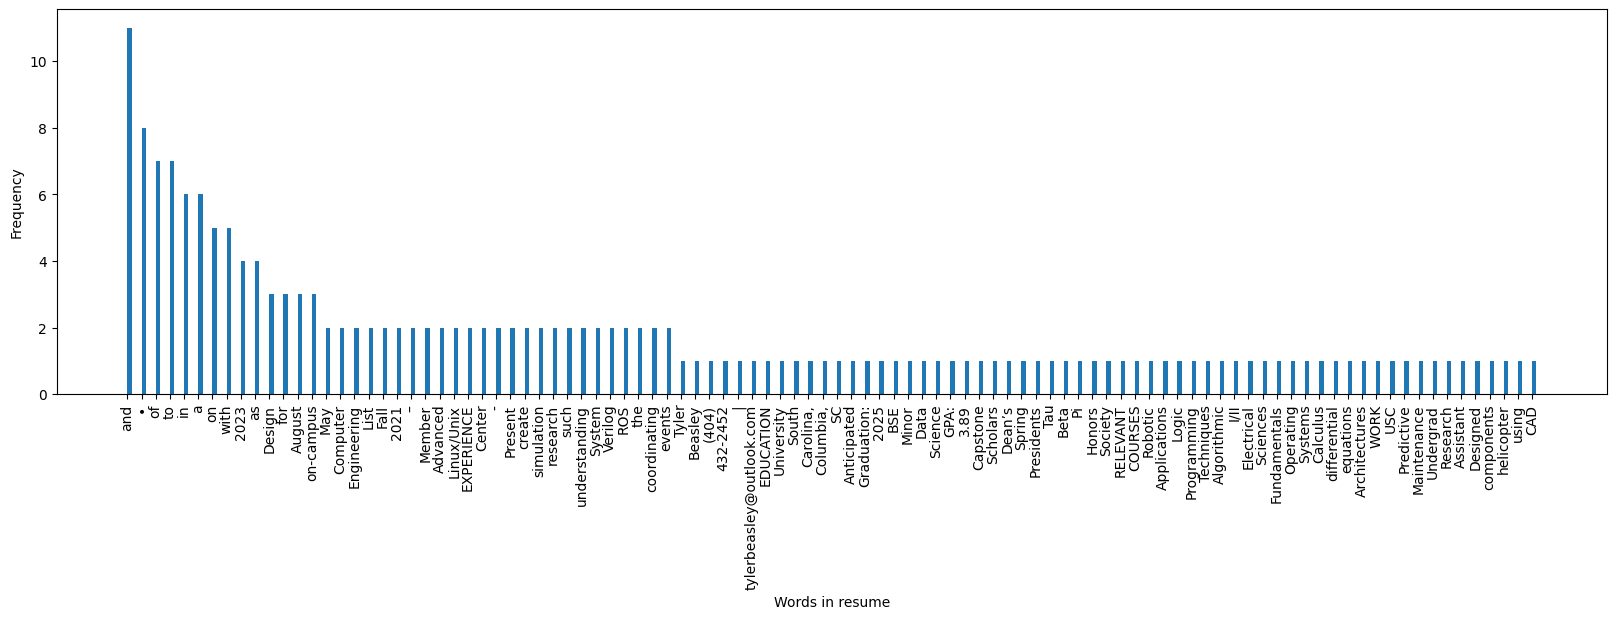

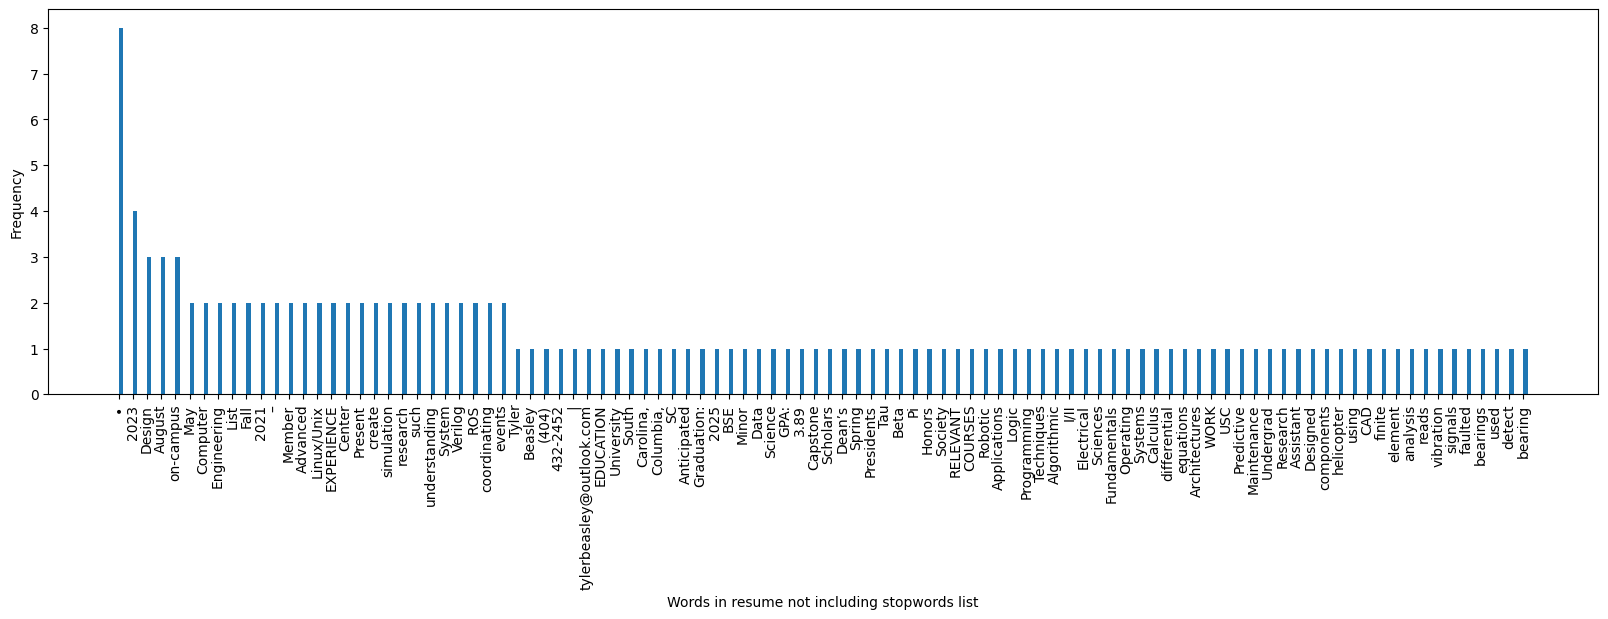

In [1]:
from tika import parser
import os
import glob
import matplotlib.pyplot as plt


def pdftotext (infile, outfile):
    # Load a file and extract information
    print ("Reading from " + infile)
    
    # parse text and make it a string
    raw = parser.from_file(infile)
    text = raw['content']
    text = str(text)

    # text to UTF8
    UTFtext = text.encode('utf-8', errors='ignore')
    # Replace \
    UTFtext = str(UTFtext).replace('\\', '\\\\').replace('"', '\\"')
    
    # Write content to output text file
    pdf = open(outfile, 'w')
    print ("Writing to " + outfile)
    pdf.write(text)
    pdf.close()

def histogram(data, color = 'black'):
    words = ' '.join(data)
    cleaned_word = " ".join([word for word in words.split()
                            if 'http' not in word
                                and not word.startswith('@')
                                and not word.startswith('#')
                                and word != 'RT'
                            ])
    wordcount = dict()
    for word in cleaned_word.split():
        if word in wordcount:
            wordcount[word] += 1
        else:
            wordcount[word] = 1
    # sort by count and get top 100 words
    wordcount_sorted = dict(sorted(wordcount.items(), key=lambda item: item[1], reverse=True))
    while(len(wordcount_sorted) > 100):
        wordcount_sorted.popitem()
    # plot first histogram
    plt.figure(figsize=(20, 5))
    plt.bar(range(len(wordcount_sorted)), wordcount_sorted.values(), align='edge', width = 0.3)
    plt.xlabel('Words in resume')
    plt.ylabel('Frequency')
    plt.xticks(range(len(wordcount_sorted)), wordcount_sorted.keys(), rotation='vertical')
    plt.show()
    # list of stopwords
    stopwords = ['and', 'a', 'an', 'the', 'about', 'to', 'in', 'for', 'of', 'on', 'off', 'during', 'at', 'before', 'by', 'into', 'with', 'until', 'this', 'that', '-', 'My', 'much', 'many', 'as', 'be' ]
    # new dict that does not contain stopwords
    updatedict = {key: value for key, value in wordcount.items() if key not in stopwords }
    updatedict_sorted = dict(sorted(updatedict.items(), key=lambda item: item[1], reverse=True))
    while(len(updatedict_sorted) > 100):
        updatedict_sorted.popitem()
    plt.figure(figsize=(20, 5))
    plt.bar(range(len(updatedict_sorted)), updatedict_sorted.values(), align='edge', width = 0.3)
    plt.xlabel('Words in resume not including stopwords list')
    plt.ylabel('Frequency')
    plt.xticks(range(len(updatedict_sorted)), updatedict_sorted.keys(), rotation='vertical')
    plt.show()
def main():
    # input and output dir
    inpath = 'data/input/myresume/' # 'data/input/myresume' for only my resume
    outpath = 'data/output/'
    # read ins and convert to outs
    for file in glob.glob(inpath + '*.pdf'):
        print("reading " + file)
        filename = os.path.basename(file).replace(".pdf","")
        outfile = outpath + filename + '.txt'
        pdftotext(file, outfile)
    #take outs and combine
    data = ''
    for file in glob.glob(outpath + '*.txt'):
        txtfile = open(file, 'r')
        content = str( txtfile.read()).split()
        contentstr = " ".join(content)
        data = data + contentstr
        txtfile.close()
    
    outfiles = os.listdir(outpath)
    for item in outfiles:
        os.remove(os.path.join(outpath, item))
    histogram(data.split())

if __name__ == "__main__":
    main()

reading data/input/myresume/tylerbeasley_resume.pdf
Reading from data/input/myresume/tylerbeasley_resume.pdf
Writing to data/output/tylerbeasley_resume.txt


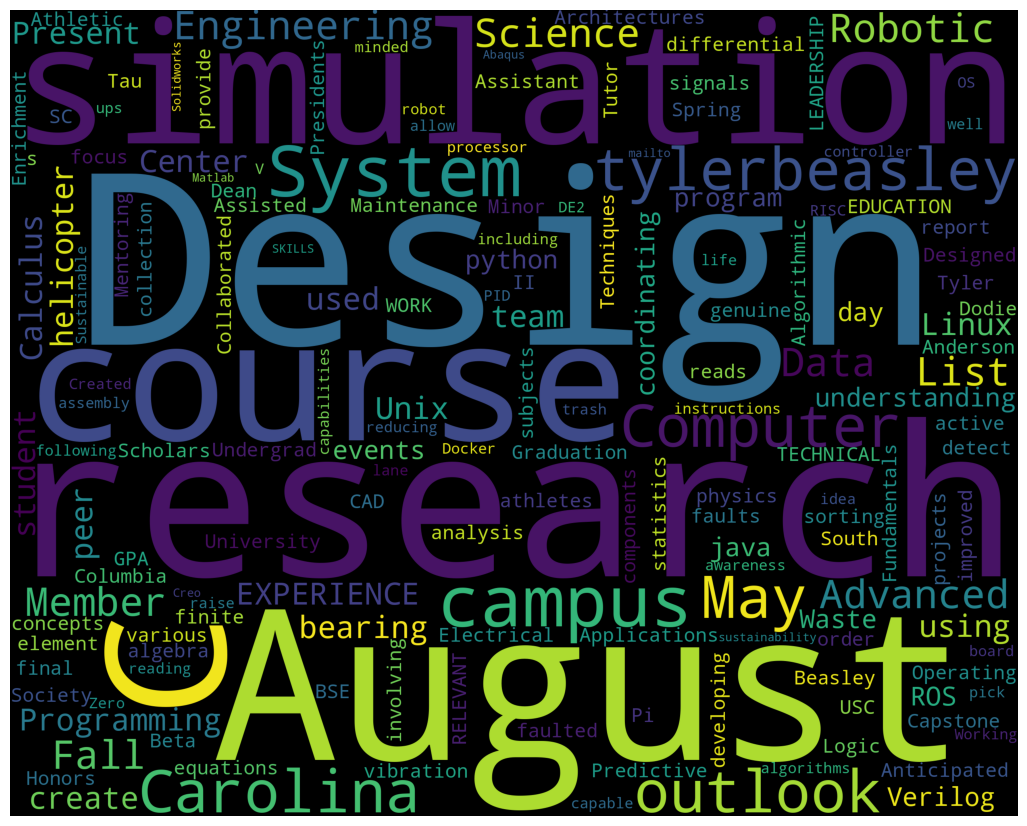

In [3]:
from tika import parser
import os
import glob
from wordcloud import WordCloud,STOPWORDS
import matplotlib.pyplot as plt


def pdftotext (infile, outfile):
    # clear vars
    raw = ''
    text = ''
    # Load a file and extract information
    print ("Reading from " + infile)
    
    # parse text and make it a string
    raw = parser.from_file(infile)
    text = raw['content']
    text = str(text)

    # text to UTF8
    UTFtext = text.encode('utf-8', errors='ignore')
    # Replace \
    UTFtext = str(UTFtext).replace('\\', '\\\\').replace('"', '\\"')
    
    # Write content to output text file
    pdf = open(outfile, 'w')
    print ("Writing to " + outfile)
    pdf.write(text)
    pdf.close()

def wordcloud(data, color = 'black'):
    words = ' '.join(data)
    cleaned_word = " ".join([word for word in words.split()
                            if 'http' not in word
                                and not word.startswith('@')
                                and not word.startswith('#')
                                and word != 'RT'
                            ])

    wordcloud = WordCloud(stopwords=STOPWORDS,
                      background_color=color,
                      width=2500,
                      height=2000
                     ).generate(cleaned_word)
    plt.figure(1,figsize=(13, 13))
    plt.imshow(wordcloud)
    plt.axis('off')
    plt.show()

def main():
    # input and output dir
    inpath = 'data/input/myresume/' # 'data/input/myresume' for only my resume
    outpath = 'data/output/'
    # read ins and convert to outs
    for file in glob.glob(inpath + '*.pdf'):
        print("reading " + file)
        filename = os.path.basename(file).replace(".pdf","")
        outfile = outpath + filename + '.txt'
        pdftotext(file, outfile)
    #take outs and combine
    data = ''
    for file in glob.glob(outpath + '*.txt'):
        txtfile = open(file, 'r')
        content = str( txtfile.read()).split()
        contentstr = " ".join(content)
        data = data + contentstr
        txtfile.close()
    # clean output directory so new files can be input and word-clouded without interference from old files
    outfiles = os.listdir(outpath)
    for item in outfiles:
        os.remove(os.path.join(outpath, item))
    wordcloud(data.split())


if __name__ == "__main__":
    main()

reading data/input/StudentResumes/Resume(4-2-2024).pdf
Reading from data/input/StudentResumes/Resume(4-2-2024).pdf
Writing to data/output/Resume(4-2-2024).txt
reading data/input/StudentResumes/Curriculum Vitae (Nafisa Mehtaj).pdf
Reading from data/input/StudentResumes/Curriculum Vitae (Nafisa Mehtaj).pdf
Writing to data/output/Curriculum Vitae (Nafisa Mehtaj).txt
reading data/input/StudentResumes/Murphy_Keenan_resume_copy.pdf
Reading from data/input/StudentResumes/Murphy_Keenan_resume_copy.pdf
Writing to data/output/Murphy_Keenan_resume_copy.txt
reading data/input/StudentResumes/AndyWaters-Resume2024 - 08.22.24.pdf
Reading from data/input/StudentResumes/AndyWaters-Resume2024 - 08.22.24.pdf
Writing to data/output/AndyWaters-Resume2024 - 08.22.24.txt
reading data/input/StudentResumes/Résumé Zak Elguindi.pdf
Reading from data/input/StudentResumes/Résumé Zak Elguindi.pdf
Writing to data/output/Résumé Zak Elguindi.txt
reading data/input/StudentResumes/JoshuaKolbuszResume.pdf
Reading from da

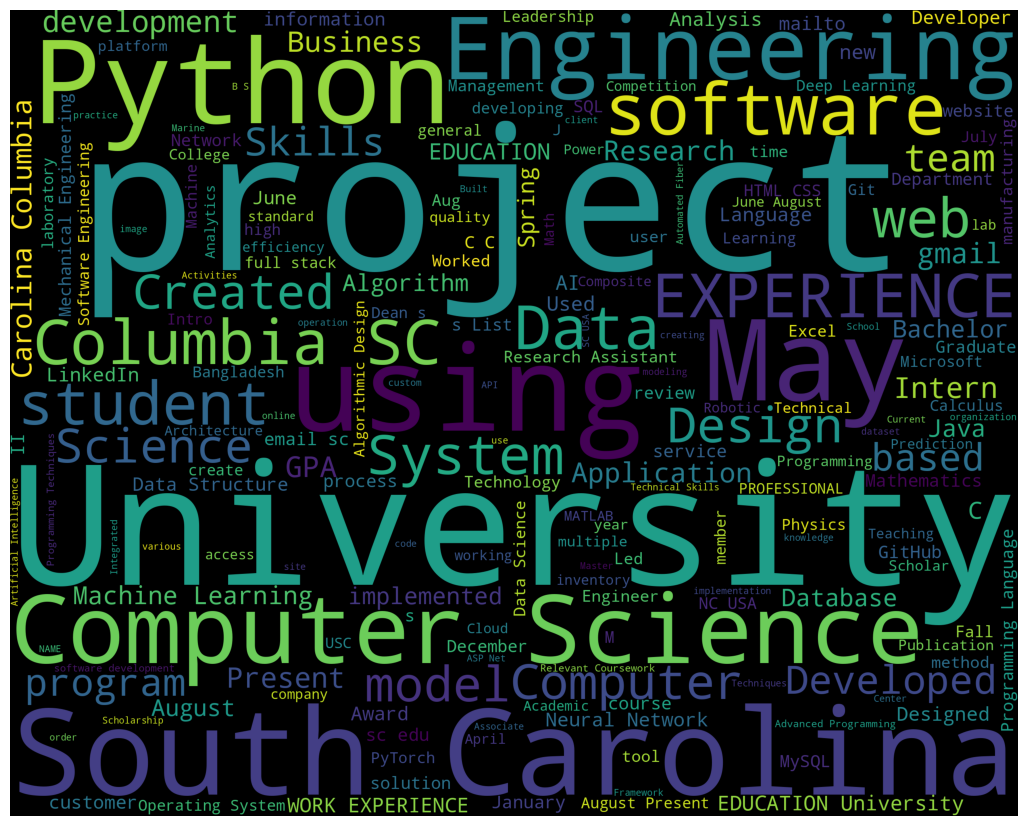

In [4]:
def main():
    # input and output dir
    inpath = 'data/input/StudentResumes/' # 'data/input/myresume' for only my resume
    outpath = 'data/output/'
    # read ins and convert to outs
    for file in glob.glob(inpath + '*.pdf'):
        print("reading " + file)
        filename = os.path.basename(file).replace(".pdf","")
        outfile = outpath + filename + '.txt'
        pdftotext(file, outfile)
    #take outs and combine
    data = ''
    for file in glob.glob(outpath + '*.txt'):
        txtfile = open(file, 'r')
        content = str( txtfile.read()).split()
        contentstr = " ".join(content)
        data = data + contentstr
        txtfile.close()
    # clean output directory so new files can be input and word-clouded without interference from old files
    outfiles = os.listdir(outpath)
    for item in outfiles:
        os.remove(os.path.join(outpath, item))
    wordcloud(data.split())


if __name__ == "__main__":
    main()